In [1]:
#mean reversion analysis


In [2]:
import yfinance as yf
import os
import pandas_ta as pt
import pandas as pd
import matplotlib.pyplot as plt


#so basically we have two steps for verification the bollinger bands and the zscorre mean reversion technique

to get nifty 50 data 

In [3]:
nifty50_tickers = [
    
   "RELIANCE.NS", "HDFCBANK.NS", "BHARTIARTL.NS", "TCS.NS", "ICICIBANK.NS", "SBIN.NS",
    "BAJFINANCE.NS", "INFY.NS", "HINDUNILVR.NS", "LT.NS", "MARUTI.NS", "ITC.NS",
    "M&M.NS", "KOTAKBANK.NS", "SUNPHARMA.NS", "HCLTECH.NS", "AXISBANK.NS", "ULTRACEMCO.NS",
    "NTPC.NS", "BAJAJFINSV.NS", "UPL.NS", "ADANIPORTS.NS", "ONGC.NS", "TITAN.NS",
    "ADANIENT.NS", "BEL.NS", "JSWSTEEL.NS", "POWERGRID.NS", "TATAMOTORS.NS", "WIPRO.NS",
    "BAJAJ-AUTO.NS", "COALINDIA.NS", "ASIANPAINT.NS", "NESTLEIND.NS", "TATASTEEL.NS",
    "EICHERMOT.NS", "JIOFIN.NS", "GRASIM.NS", "SBILIFE.NS", "HINDALCO.NS", "TRENT.NS",
    "HDFCLIFE.NS", "TECHM.NS", "CIPLA.NS", "SHRIRAMFIN.NS", "TATACONSUM.NS", "APOLLOHOSP.NS",
    "HEROMOTOCO.NS", "DRREDDY.NS", "INDUSINDBK.NS"

]
data=yf.download(nifty50_tickers,start="2024-01-01",end="2025-09-28",group_by="Ticker")
data


C:\Users\karti\AppData\Local\Temp\ipykernel_13192\1058979359.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(nifty50_tickers,start="2024-01-01",end="2025-09-28",group_by="Ticker")
[*********************100%***********************]  50 of 50 completed


Ticker      AXISBANK.NS                                                   \
Price              Open         High          Low        Close    Volume   
Date                                                                       
2024-01-01  1093.221183  1102.206563  1091.224432  1095.916748   4083732   
2024-01-02  1093.321092  1097.564188  1080.541957  1091.474121   7895577   
2024-01-03  1089.227799  1100.808932  1079.543605  1096.815430  10225290   
2024-01-04  1101.208308  1128.164450  1098.263149  1121.575195  11411683   
2024-01-05  1122.174113  1138.048308  1117.182235  1135.103027   8025466   
...                 ...          ...          ...          ...       ...   
2025-09-22  1136.000000  1147.599976  1131.199951  1144.400024   7689900   
2025-09-23  1146.000000  1172.800049  1141.900024  1170.800049  16079093   
2025-09-24  1168.000000  1172.800049  1154.000000  1158.900024  12812055   
2025-09-25  1154.699951  1171.800049  1153.400024  1166.599976  11188302   
2025-09-26  1161.599976  1169.699951  1148.000000  1154.000000   5618932   

Ticker     HDFCBANK.NS                                                ...  \
Price             Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2024-01-01  832.352017  833.888904  825.521461  828.497620  14239686  ...   
2024-01-02  828.839201  830.790789  823.911395  828.985535  29242092  ...   
2024-01-03  830.400423  831.717721  814.275408  816.202637  28389762  ...   
2024-01-04  818.690986  826.960815  815.129315  824.960449  26734056  ...   
2024-01-05  823.155238  831.815407  813.860778  820.740112  31889470  ...   
...                ...         ...         ...         ...       ...  ...   
2025-09-22  964.000000  971.200012  961.950012  964.200012  10854415  ...   
2025-09-23  967.000000  968.200012  955.500000  957.200012  21022298  ...   
2025-09-24  952.200012  956.450012  943.000000  951.049988  15117220  ...   
2025-09-25  952.500000  958.000000  947.400024  949.849976  31413279  ...   
2025-09-26  945.099976  951.450012  941.299988  945.049988  14874656  ...   

Ticker      JSWSTEEL.NS                                                  \
Price              Open         High          Low        Close   Volume   
Date                                                                      
2024-01-01   871.062551   875.565049   865.867347   868.440186   778184   
2024-01-02   874.624988   874.624988   850.133310   861.117493  1615515   
2024-01-03   860.919556   860.919556   827.274424   828.907227  3983411   
2024-01-04   831.480062   834.992997   826.284858   828.362915  1878399   
2024-01-05   830.193597   836.972077   818.566236   820.743286  2060548   
...                 ...          ...          ...          ...      ...   
2025-09-22  1122.000000  1126.800049  1111.599976  1117.000000   786218   
2025-09-23  1125.000000  1148.000000  1117.099976  1138.400024  2075493   
2025-09-24  1138.400024  1161.000000  1133.000000  1149.099976  2111388   
2025-09-25  1149.099976  1157.500000  1140.000000  1148.500000  1581307   
2025-09-26  1155.000000  1167.900024  1127.900024  1130.800049  2999892   

Ticker     KOTAKBANK.NS                                                  
Price              Open         High          Low        Close   Volume  
Date                                                                     
2024-01-01  1904.713960  1914.691508  1888.849634  1904.863647  1425902  
2024-01-02  1903.716192  1903.716192  1855.923711  1860.862671  5120796  
2024-01-03  1859.814935  1865.801464  1843.501668  1861.710693  3781515  
2024-01-04  1867.298181  1867.298181  1856.372814  1859.415894  2865766  
2024-01-05  1861.311618  1865.701763  1837.265751  1843.451782  7799341  
...                 ...          ...          ...          ...      ...  
2025-09-22  2032.000000  2039.599976  2017.400024  2021.699951  2645982  
2025-09-23  2023.000000  2053.100098  2008.400024  2047.699951  5

In [7]:
a=pd.DataFrame(data)
a.to_csv("nifty 50 data")
a

Ticker      AXISBANK.NS                                                   \
Price              Open         High          Low        Close    Volume   
Date                                                                       
2024-01-01  1093.221183  1102.206563  1091.224432  1095.916748   4083732   
2024-01-02  1093.321092  1097.564188  1080.541957  1091.474121   7895577   
2024-01-03  1089.227799  1100.808932  1079.543605  1096.815430  10225290   
2024-01-04  1101.208308  1128.164450  1098.263149  1121.575195  11411683   
2024-01-05  1122.174113  1138.048308  1117.182235  1135.103027   8025466   
...                 ...          ...          ...          ...       ...   
2025-09-22  1136.000000  1147.599976  1131.199951  1144.400024   7689900   
2025-09-23  1146.000000  1172.800049  1141.900024  1170.800049  16079093   
2025-09-24  1168.000000  1172.800049  1154.000000  1158.900024  12812055   
2025-09-25  1154.699951  1171.800049  1153.400024  1166.599976  11188302   
2025-09-26  1161.599976  1169.699951  1148.000000  1154.000000   5618932   

Ticker     HDFCBANK.NS                                                ...  \
Price             Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2024-01-01  832.352017  833.888904  825.521461  828.497620  14239686  ...   
2024-01-02  828.839201  830.790789  823.911395  828.985535  29242092  ...   
2024-01-03  830.400423  831.717721  814.275408  816.202637  28389762  ...   
2024-01-04  818.690986  826.960815  815.129315  824.960449  26734056  ...   
2024-01-05  823.155238  831.815407  813.860778  820.740112  31889470  ...   
...                ...         ...         ...         ...       ...  ...   
2025-09-22  964.000000  971.200012  961.950012  964.200012  10854415  ...   
2025-09-23  967.000000  968.200012  955.500000  957.200012  21022298  ...   
2025-09-24  952.200012  956.450012  943.000000  951.049988  15117220  ...   
2025-09-25  952.500000  958.000000  947.400024  949.849976  31413279  ...   
2025-09-26  945.099976  951.450012  941.299988  945.049988  14874656  ...   

Ticker      JSWSTEEL.NS                                                  \
Price              Open         High          Low        Close   Volume   
Date                                                                      
2024-01-01   871.062551   875.565049   865.867347   868.440186   778184   
2024-01-02   874.624988   874.624988   850.133310   861.117493  1615515   
2024-01-03   860.919556   860.919556   827.274424   828.907227  3983411   
2024-01-04   831.480062   834.992997   826.284858   828.362915  1878399   
2024-01-05   830.193597   836.972077   818.566236   820.743286  2060548   
...                 ...          ...          ...          ...      ...   
2025-09-22  1122.000000  1126.800049  1111.599976  1117.000000   786218   
2025-09-23  1125.000000  1148.000000  1117.099976  1138.400024  2075493   
2025-09-24  1138.400024  1161.000000  1133.000000  1149.099976  2111388   
2025-09-25  1149.099976  1157.500000  1140.000000  1148.500000  1581307   
2025-09-26  1155.000000  1167.900024  1127.900024  1130.800049  2999892   

Ticker     KOTAKBANK.NS                                                  
Price              Open         High          Low        Close   Volume  
Date                                                                     
2024-01-01  1904.713960  1914.691508  1888.849634  1904.863647  1425902  
2024-01-02  1903.716192  1903.716192  1855.923711  1860.862671  5120796  
2024-01-03  1859.814935  1865.801464  1843.501668  1861.710693  3781515  
2024-01-04  1867.298181  1867.298181  1856.372814  1859.415894  2865766  
2024-01-05  1861.311618  1865.701763  1837.265751  1843.451782  7799341  
...                 ...          ...          ...          ...      ...  
2025-09-22  2032.000000  2039.599976  2017.400024  2021.699951  2645982  
2025-09-23  2023.000000  2053.100098  2008.400024  2047.699951  5

In [8]:
a.columns = a.columns.get_level_values(0)+a.columns.get_level_values(1)  # 1 = second level

# For columns like 'SUNPHARMA.NSClose'
close_cols = [col for col in a.columns if col.endswith("Close")]
a.columns
close_cols

['AXISBANK.NSClose',
 'HDFCBANK.NSClose',
 'NTPC.NSClose',
 'INFY.NSClose',
 'APOLLOHOSP.NSClose',
 'EICHERMOT.NSClose',
 'ITC.NSClose',
 'BAJAJ-AUTO.NSClose',
 'NESTLEIND.NSClose',
 'HCLTECH.NSClose',
 'TATACONSUM.NSClose',
 'LT.NSClose',
 'DRREDDY.NSClose',
 'BEL.NSClose',
 'TCS.NSClose',
 'HINDALCO.NSClose',
 'TECHM.NSClose',
 'UPL.NSClose',
 'CIPLA.NSClose',
 'ICICIBANK.NSClose',
 'HEROMOTOCO.NSClose',
 'ONGC.NSClose',
 'TATAMOTORS.NSClose',
 'JIOFIN.NSClose',
 'SHRIRAMFIN.NSClose',
 'COALINDIA.NSClose',
 'TITAN.NSClose',
 'POWERGRID.NSClose',
 'ASIANPAINT.NSClose',
 'ADANIENT.NSClose',
 'INDUSINDBK.NSClose',
 'SBIN.NSClose',
 'SBILIFE.NSClose',
 'GRASIM.NSClose',
 'BAJAJFINSV.NSClose',
 'ULTRACEMCO.NSClose',
 'MARUTI.NSClose',
 'TRENT.NSClose',
 'SUNPHARMA.NSClose',
 'TATASTEEL.NSClose',
 'ADANIPORTS.NSClose',
 'BHARTIARTL.NSClose',
 'HDFCLIFE.NSClose',
 'WIPRO.NSClose',
 'BAJFINANCE.NSClose',
 'M&M.NSClose',
 'RELIANCE.NSClose',
 'HINDUNILVR.NSClose',
 'JSWSTEEL.NSClose',
 'KOTAK

In [9]:
close_cols = [col for col in a.columns if col.endswith("Close")]

In [10]:
rolling_window = 14

for col in close_cols:
    # Rolling mean
    a[col + "_RollingMean"] = a[col].rolling(rolling_window).mean()
    # Rolling standard deviation
    a[col + "_RollingStd"] = a[col].rolling(rolling_window).std()
    # Z-score
    a[col + "_ZScore"] = (a[col] - a[col + "_RollingMean"]) / a[col + "_RollingStd"]


C:\Users\karti\AppData\Local\Temp\ipykernel_13192\4084364929.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a[col + "_RollingMean"] = a[col].rolling(rolling_window).mean()
C:\Users\karti\AppData\Local\Temp\ipykernel_13192\4084364929.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a[col + "_RollingStd"] = a[col].rolling(rolling_window).std()
C:\Users\karti\AppData\Local\Temp\ipykernel_13192\4084364929.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [11]:
zscore=[col for col in a.columns if col.endswith("ZScore")]

In [12]:
zscore

['AXISBANK.NSClose_ZScore',
 'HDFCBANK.NSClose_ZScore',
 'NTPC.NSClose_ZScore',
 'INFY.NSClose_ZScore',
 'APOLLOHOSP.NSClose_ZScore',
 'EICHERMOT.NSClose_ZScore',
 'ITC.NSClose_ZScore',
 'BAJAJ-AUTO.NSClose_ZScore',
 'NESTLEIND.NSClose_ZScore',
 'HCLTECH.NSClose_ZScore',
 'TATACONSUM.NSClose_ZScore',
 'LT.NSClose_ZScore',
 'DRREDDY.NSClose_ZScore',
 'BEL.NSClose_ZScore',
 'TCS.NSClose_ZScore',
 'HINDALCO.NSClose_ZScore',
 'TECHM.NSClose_ZScore',
 'UPL.NSClose_ZScore',
 'CIPLA.NSClose_ZScore',
 'ICICIBANK.NSClose_ZScore',
 'HEROMOTOCO.NSClose_ZScore',
 'ONGC.NSClose_ZScore',
 'TATAMOTORS.NSClose_ZScore',
 'JIOFIN.NSClose_ZScore',
 'SHRIRAMFIN.NSClose_ZScore',
 'COALINDIA.NSClose_ZScore',
 'TITAN.NSClose_ZScore',
 'POWERGRID.NSClose_ZScore',
 'ASIANPAINT.NSClose_ZScore',
 'ADANIENT.NSClose_ZScore',
 'INDUSINDBK.NSClose_ZScore',
 'SBIN.NSClose_ZScore',
 'SBILIFE.NSClose_ZScore',
 'GRASIM.NSClose_ZScore',
 'BAJAJFINSV.NSClose_ZScore',
 'ULTRACEMCO.NSClose_ZScore',
 'MARUTI.NSClose_ZScore',

In [13]:
newdf=a[zscore]

In [14]:
newdf.to_csv("zscores1.csv")

C:\Users\karti\AppData\Local\Temp\ipykernel_13192\770361447.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty_data = yf.download(nifty_index, start=a.index[0], end=a.index[-1])['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\karti\AppData\Local\Temp\ipykernel_13192\770361447.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_returns = a[close_cols].pct_change().dropna()


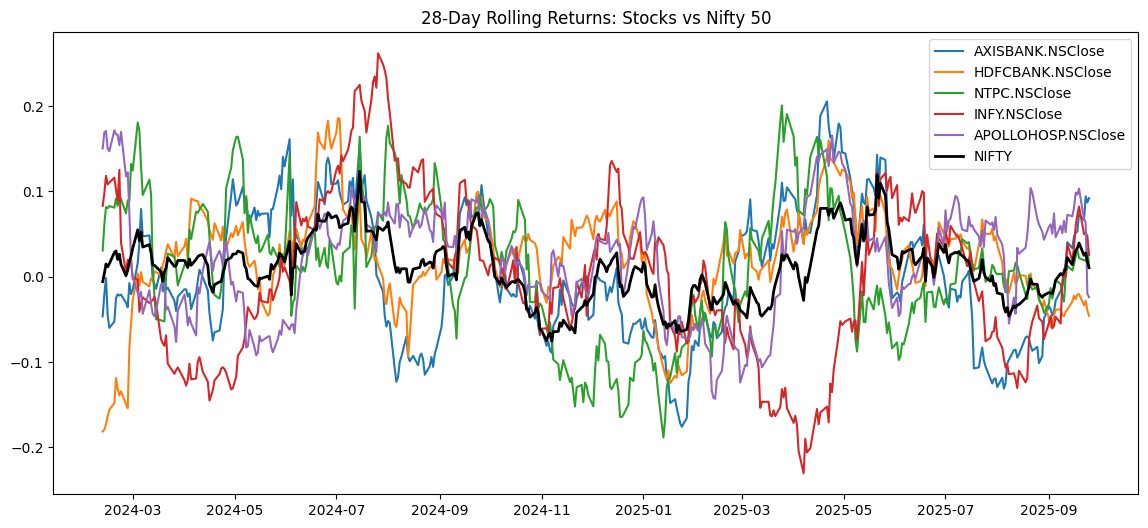

In [15]:
nifty_index = "^NSEI"
nifty_data = yf.download(nifty_index, start=a.index[0], end=a.index[-1])['Close']

# 3️⃣ Compute daily returns for all stocks and Nifty
stock_returns = a[close_cols].pct_change().dropna()
nifty_returns = nifty_data.pct_change().dropna()

# Align dates
stock_returns = stock_returns.loc[nifty_returns.index]

# 4️⃣ Compute 28-day rolling cumulative returns
rolling_window = 28

def rolling_cum_return(x):
    return (x + 1).prod() - 1

rolling_stock_returns = stock_returns.rolling(rolling_window).apply(rolling_cum_return, raw=True)
rolling_nifty_returns = nifty_returns.rolling(rolling_window).apply(rolling_cum_return, raw=True)

# 5️⃣ Combine into a single DataFrame for comparison
comparison = rolling_stock_returns.copy()
comparison['NIFTY'] = rolling_nifty_returns

# 6️⃣ Compute excess returns vs Nifty
comparison_excess = comparison.subtract(comparison['NIFTY'], axis=0)

# 7️⃣ Optional: Save to Excel
comparison.to_csv("28DayRollingReturns.csv")
comparison_excess.to_csv("28DayExcessReturns1.csv")

# 8️⃣ Plot example for first 5 stocks
plt.figure(figsize=(14,6))
for col in close_cols[:5]:  # change number as needed
    plt.plot(comparison[col], label=col)
plt.plot(comparison['NIFTY'], label='NIFTY', color='black', linewidth=2)
plt.title("28-Day Rolling Returns: Stocks vs Nifty 50")
plt.legend()
plt.show()

In [ ]:
returns_df = pd.read_excel("28DayExcessReturns.xlsx", index_col=0)

# Z-Scores
zscore_df = pd.read_excel("zscores_for_nifty_50.xlsx", index_col=0)
zscore_cols = [col.replace('_ZScore','') for col in zscore_df.columns if '_ZScore' in col]

# Keep only tickers present in returns
tickers = list(set(returns_df.columns) & set(zscore_cols))
latest_date = returns_df.index[-1]

# Get last 28-day excess returns
latest_excess = returns_df.loc[latest_date, tickers]

# Get latest Z-Scores
latest_zscores = zscore_df.loc[latest_date, [col+'_ZScore' for col in tickers]]
latest_zscores.index = tickers  # rename to match tickers

# Combine into one DataFrame
combined = pd.DataFrame({
    'ExcessReturn': latest_excess,
    'ZScore': latest_zscores[tickers]
})

# Example: filter top candidates
# - Positive excess return
# - Z-Score < 0 (oversold)
top_candidates = combined[(combined['ExcessReturn'] > 0) & (combined['ZScore'] < 0)]

# Sort by highest excess return or lowest Z-Score
top_candidates = top_candidates.sort_values(by=['ExcessReturn','ZScore'], ascending=[False, True])

print(top_candidates.head(10))

Empty DataFrame
Columns: [ExcessReturn, ZScore]
Index: []


,BBL_28_2.0,BBM_28_2.0,BBU_28_2.0,BBB_28_2.0,BBP_28_2.0
Date,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN
2024-01-02,NaN,NaN,NaN,NaN,NaN
2024-01-03,NaN,NaN,NaN,NaN,NaN
2024-01-04,NaN,NaN,NaN,NaN,NaN
2024-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-09-22,572.992261,608.683923,644.375585,11.727486,0.768495
2025-09-23,572.758087,609.024994,645.291901,11.909826,0.772631
2025-09-24,572.672761,609.335709,645.998657,12.033743,0.715672
